# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####  데이터 수집

In [119]:
#데이터셋을 로드
from sklearn import datasets
boston = datasets.fetch_openml('boston')
boston

/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':       CRIM      ZN   INDUS CHAS    NOX     RM     AGE    DIS RAD      TAX  \
 0   0.0063 18.0000  2.3100    0 0.5380 6.5750 65.2000 4.0900   1 296.0000   
 1   0.0273  0.0000  7.0700    0 0.4690 6.4210 78.9000 4.9671   2 242.0000   
 2   0.0273  0.0000  7.0700    0 0.4690 7.1850 61.1000 4.9671   2 242.0000   
 3   0.0324  0.0000  2.1800    0 0.4580 6.9980 45.8000 6.0622   3 222.0000   
 4   0.0691  0.0000  2.1800    0 0.4580 7.1470 54.2000 6.0622   3 222.0000   
 ..     ...     ...     ...  ...    ...    ...     ...    ...  ..      ...   
 501 0.0626  0.0000 11.9300    0 0.5730 6.5930 69.1000 2.4786   1 273.0000   
 502 0.0453  0.0000 11.9300    0 0.5730 6.1200 76.7000 2.2875   1 273.0000   
 503 0.0608  0.0000 11.9300    0 0.5730 6.9760 91.0000 2.1675   1 273.0000   
 504 0.1096  0.0000 11.9300    0 0.5730 6.7940 89.3000 2.3889   1 273.0000   
 505 0.0474  0.0000 11.9300    0 0.5730 6.0300 80.8000 2.5050   1 273.0000   
 
      PTRATIO        B  LSTAT  
 0    15.3000 396.9000

####  데이터 이해

In [120]:
#데이터셋 정보확인
dir(boston)
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

![image.png](./images/boston_features.png)

In [121]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환
type(boston.data)

pandas.core.frame.DataFrame

In [122]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인


boston_df = boston.data
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300


In [123]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0,0.5730,6.5930,69.1000,2.4786,1,273.0000,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0,0.5730,6.1200,76.7000,2.2875,1,273.0000,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0,0.5730,6.9760,91.0000,2.1675,1,273.0000,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0,0.5730,6.7940,89.3000,2.3889,1,273.0000,21.0000,393.4500,6.4800,22.0000


In [124]:
#데이터의 크기와 형태를 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [125]:
# 데이터프레임 정보


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [126]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.
boston_df.drop(['CHAS'], axis=1, inplace=True)
boston_df.drop(['RAD'], axis=1, inplace=True)

In [127]:
# CHAS 컬럼 확인
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  PRICE    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [128]:
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0000,2.3100,0.5380,6.5750,65.2000,4.0900,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0.4690,6.4210,78.9000,4.9671,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0.4690,7.1850,61.1000,4.9671,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0.4580,6.9980,45.8000,6.0622,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0.4580,7.1470,54.2000,6.0622,222.0000,18.7000,396.9000,5.3300,36.2000
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0.5730,6.5930,69.1000,2.4786,273.0000,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0.5730,6.1200,76.7000,2.2875,273.0000,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0.5730,6.9760,91.0000,2.1675,273.0000,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0.5730,6.7940,89.3000,2.3889,273.0000,21.0000,393.4500,6.4800,22.0000


In [129]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

In [130]:
# 독립변수들만 가지고 루프
fea = []
for f in boston_df.columns[:-1]:
    fea.append(f)
fea

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


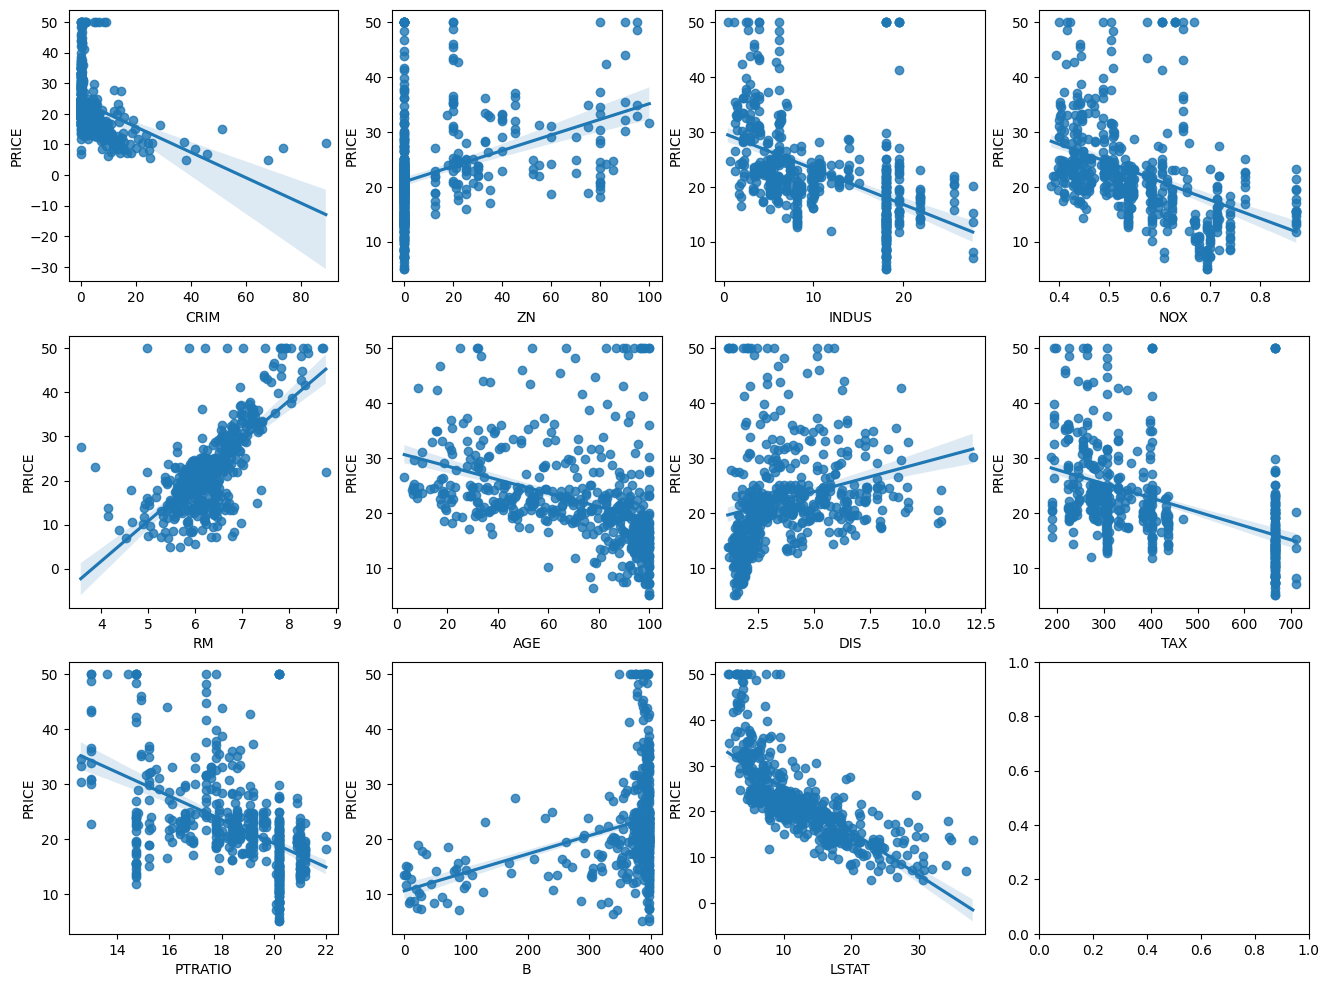

In [131]:
# 각각의 독립변수와 종속변수 간의 관계를 시각화하여 subplot()으로 그림

import seaborn as sns

# subplot 캔버스를 준비한다.
fix, ax = plt.subplots(figsize=(16,12), nrows=3, ncols=4)

for i , feature in enumerate(boston_df.columns[:-1]):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=ax[row][col])

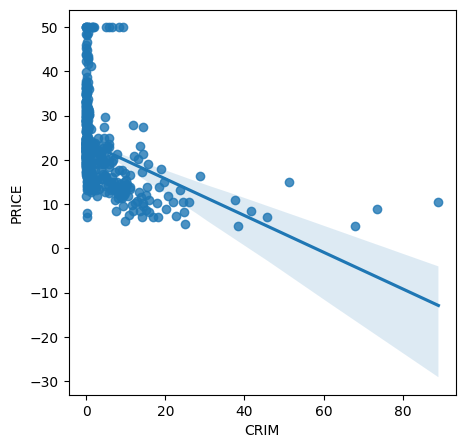

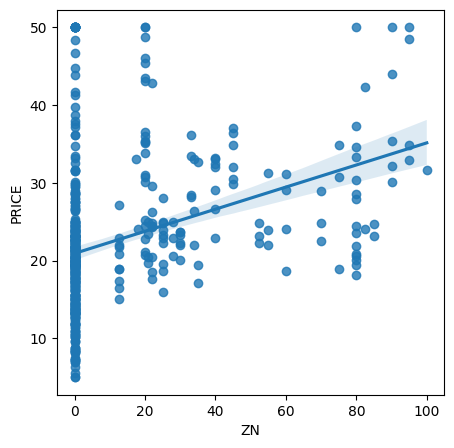

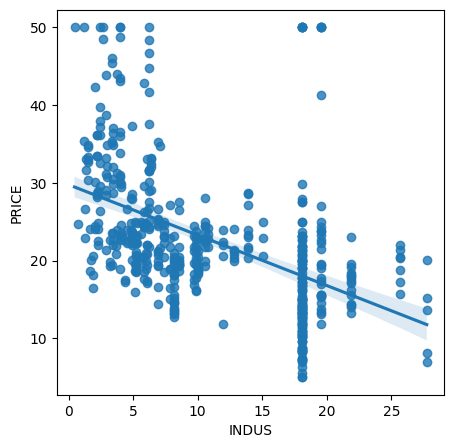

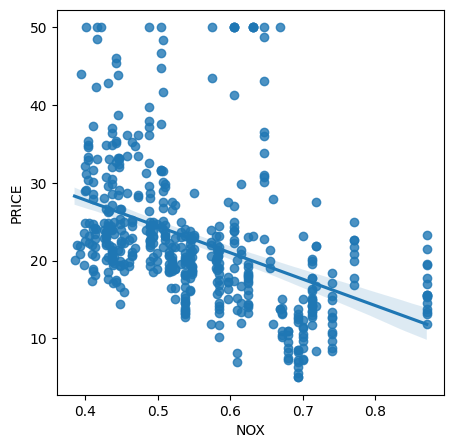

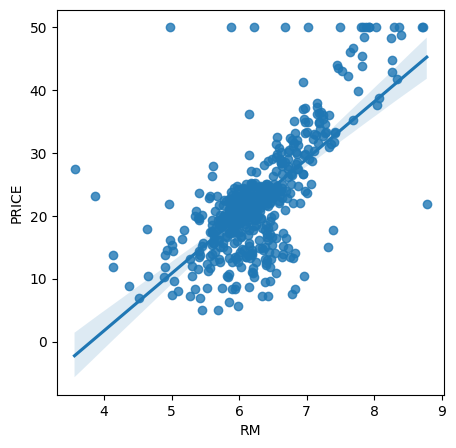

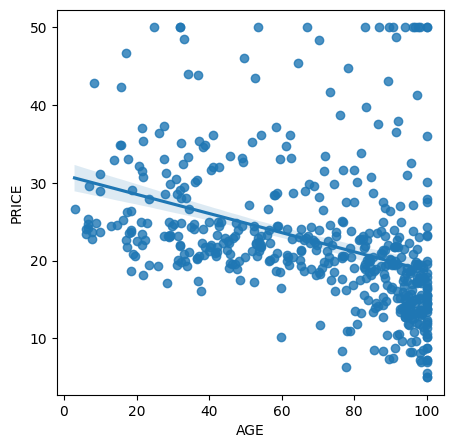

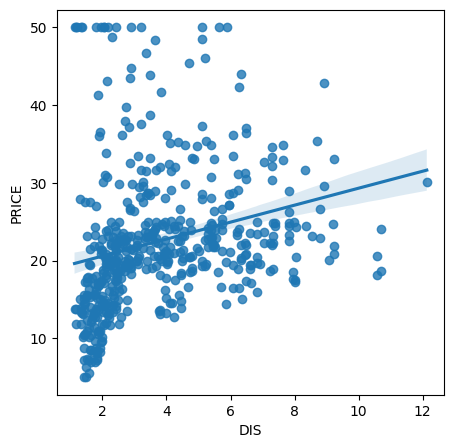

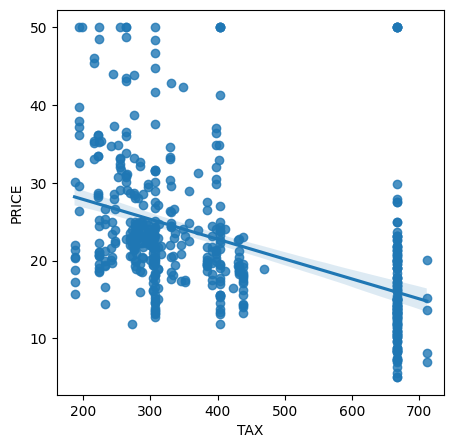

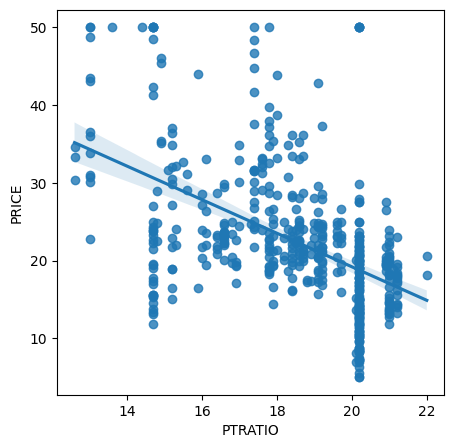

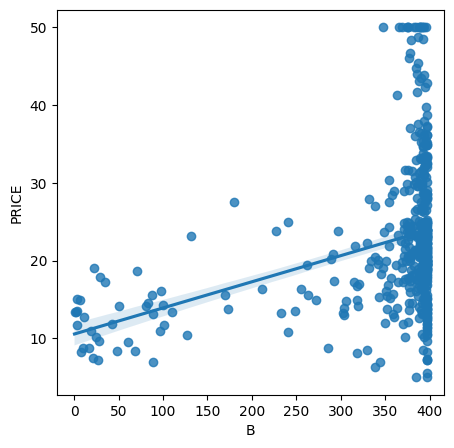

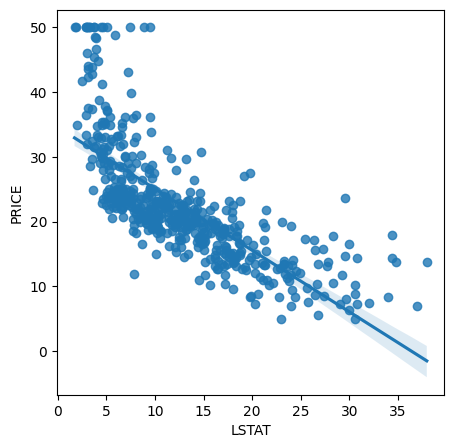

In [132]:
# 한장씩 아래로 그리는 방법도 가능
for i, feature in enumerate(boston_df.columns[:-1]):
    plt.figure(figsize=(5,5))
    sns.regplot(x=feature, y='PRICE', data=boston_df)

#### pairplot(): 수치형 변수에 적용 가능

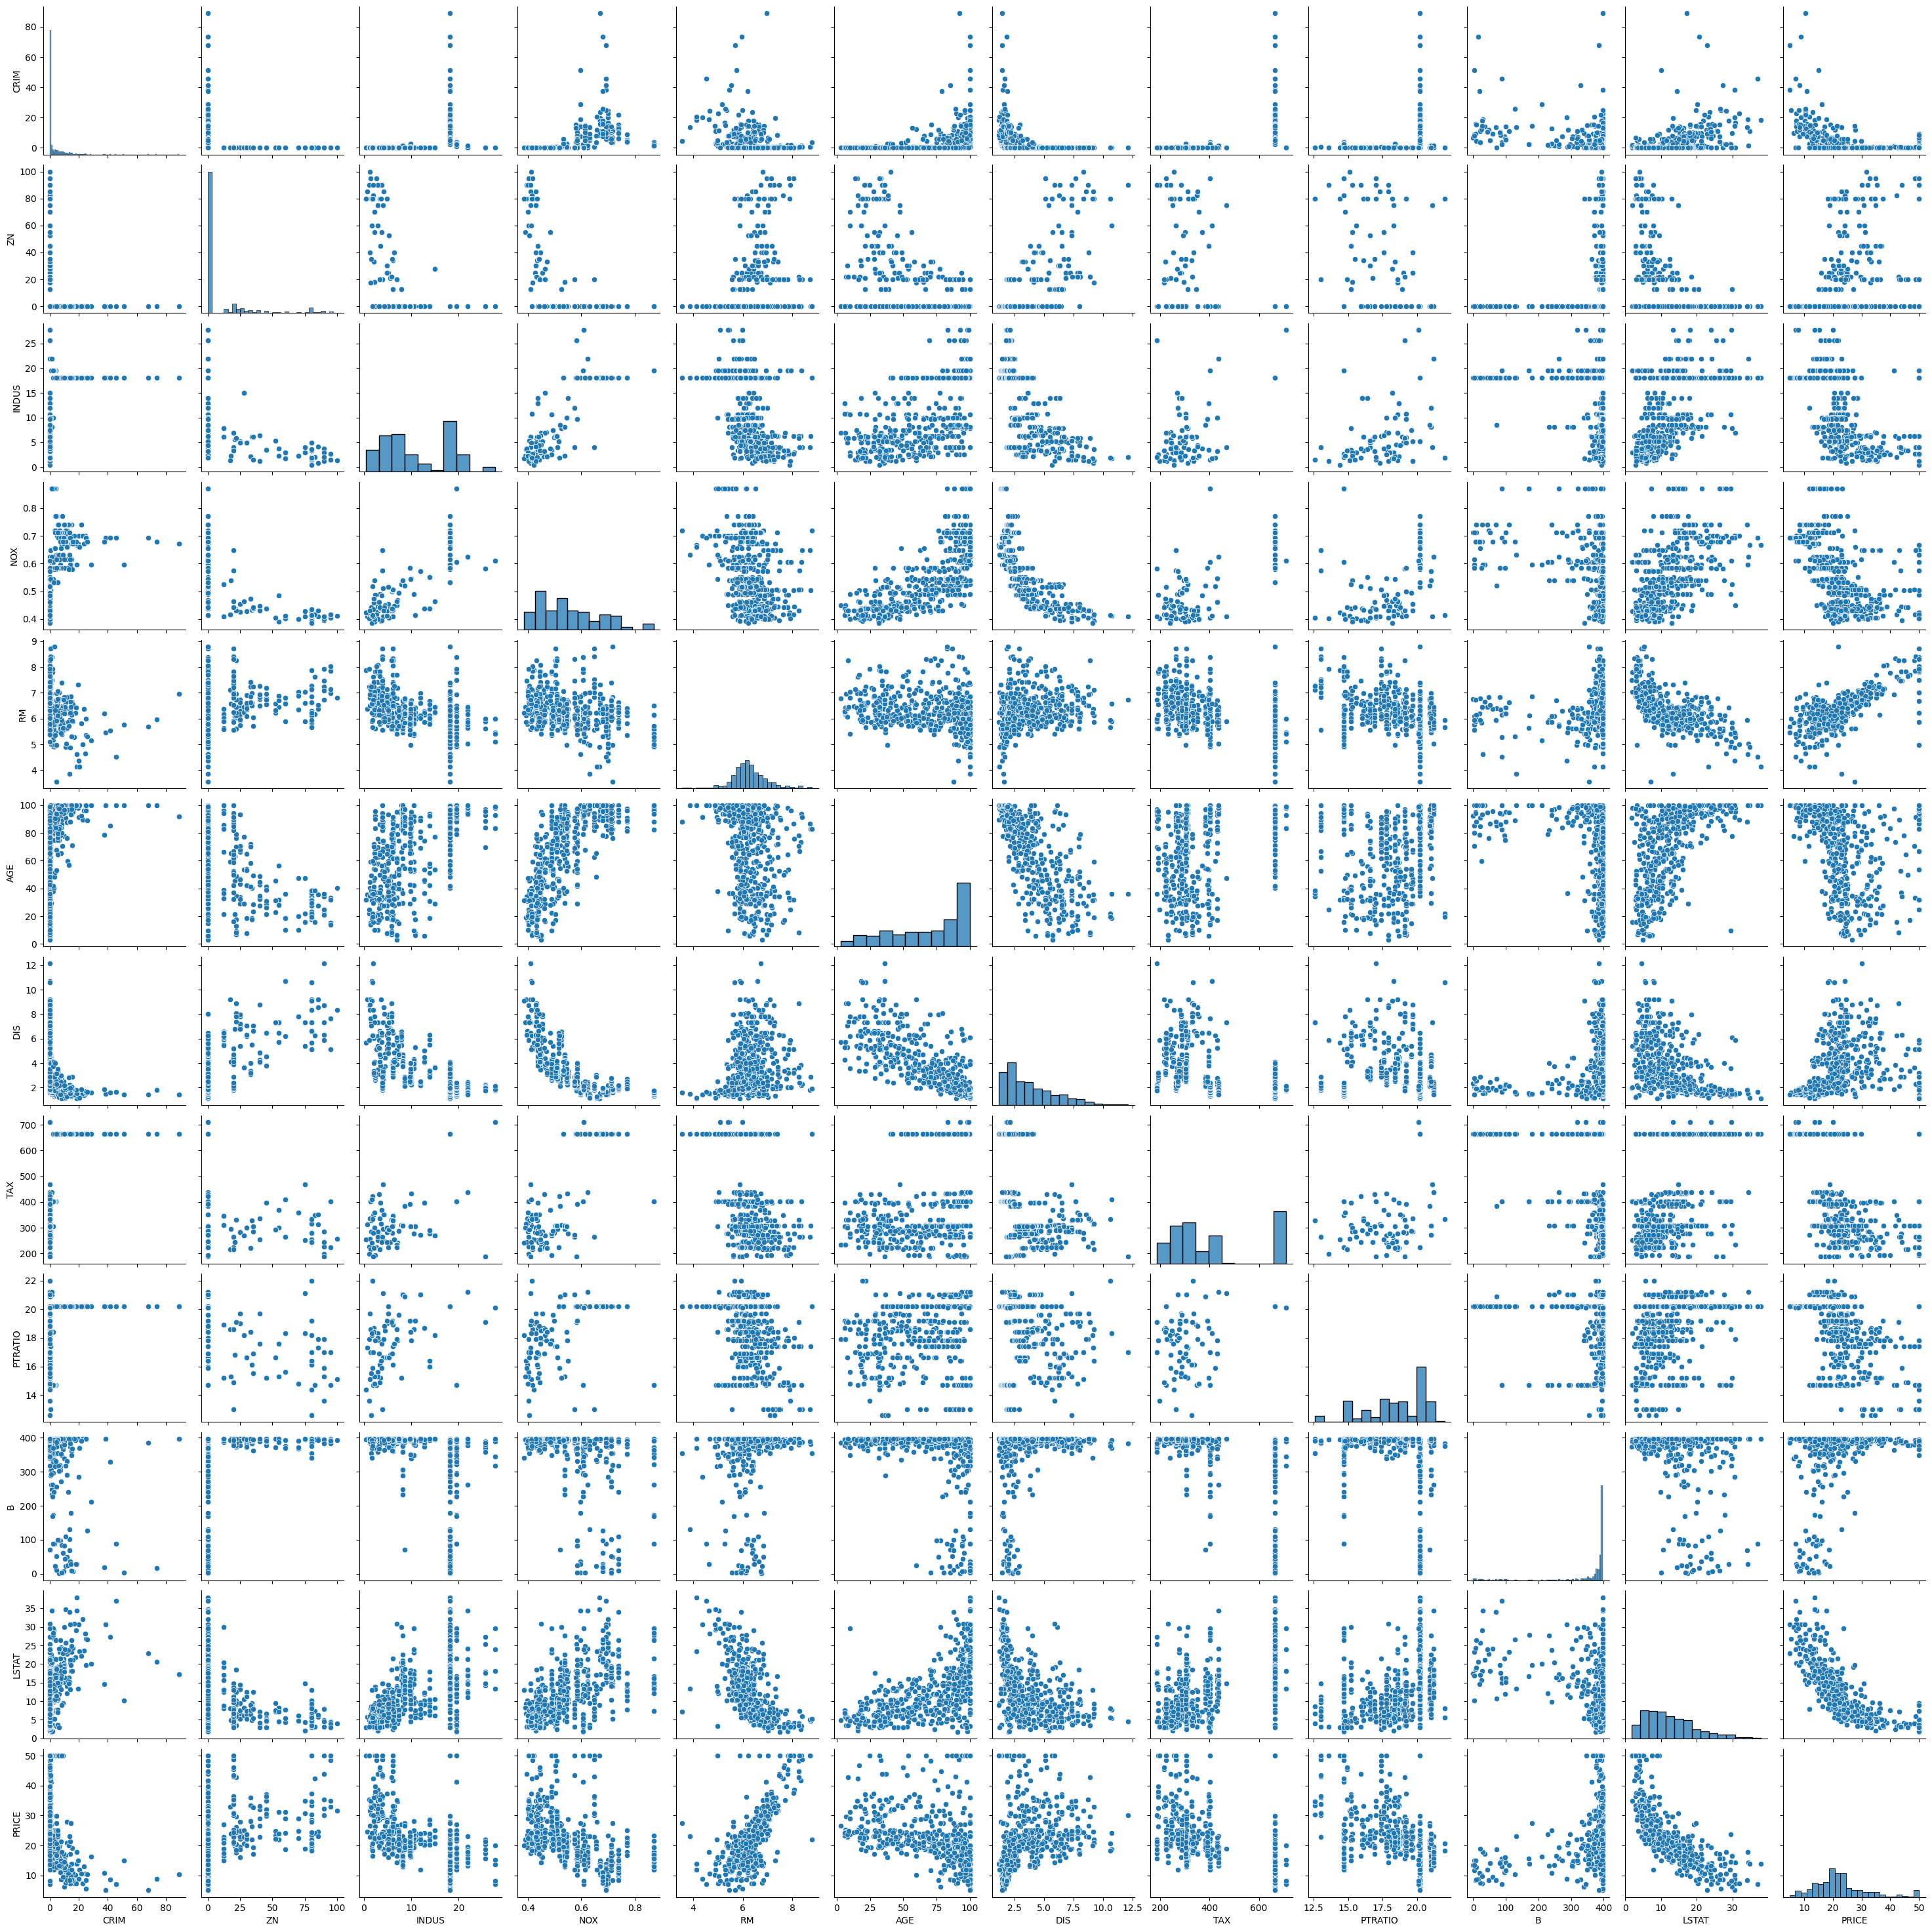

In [133]:
# pairplot으로 독립변수 간의 관계를 시각화
features = boston_df.columns
#features = ['INDUS', 'LSTAT', 'RM', "PRICE"]
sns.pairplot(boston_df[features])

<AxesSubplot: >

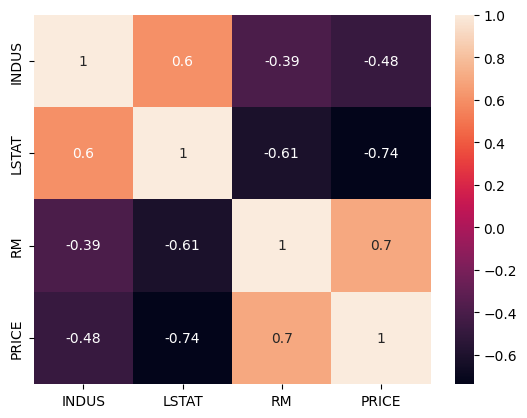

In [134]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()
features = ['INDUS', 'LSTAT', 'RM', 'PRICE']
corr_df = boston_df[features].corr()
sns.heatmap(corr_df, annot=True)

In [135]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다


# 변수 간의 상관 계수를 구한다

#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션



# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [136]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0000,2.3100,0.5380,6.5750,65.2000,4.0900,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0.4690,6.4210,78.9000,4.9671,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0.4690,7.1850,61.1000,4.9671,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0.4580,6.9980,45.8000,6.0622,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0.4580,7.1470,54.2000,6.0622,222.0000,18.7000,396.9000,5.3300,36.2000
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0626,0.0000,11.9300,0.5730,6.5930,69.1000,2.4786,273.0000,21.0000,391.9900,9.6700,22.4000
502,0.0453,0.0000,11.9300,0.5730,6.1200,76.7000,2.2875,273.0000,21.0000,396.9000,9.0800,20.6000
503,0.0608,0.0000,11.9300,0.5730,6.9760,91.0000,2.1675,273.0000,21.0000,396.9000,5.6400,23.9000
504,0.1096,0.0000,11.9300,0.5730,6.7940,89.3000,2.3889,273.0000,21.0000,393.4500,6.4800,22.0000


### 데이터 준비

#### 데이터 분할

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
# X(독립변수), Y(종속변수) 분할
#x = boston_df[boston_df.columns[:-1]]
x = boston_df.drop(['PRICE'], axis=1)
y= boston_df['PRICE']

# 학습용 데이터와 평가용 데이터로 분할하기
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [139]:
#X_train 데이터 일부 확인
x_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
5,0.0299,0.0000,2.1800,0.4580,6.4300,58.7000,6.0622,222.0000,18.7000,394.1200,5.2100
116,0.1316,0.0000,10.0100,0.5470,6.1760,72.5000,2.7301,432.0000,17.8000,393.3000,12.0400
45,0.1714,0.0000,6.9100,0.4480,5.6820,33.8000,5.1004,233.0000,17.9000,396.9000,10.2100
16,1.0539,0.0000,8.1400,0.5380,5.9350,29.3000,4.4986,307.0000,21.0000,386.8500,6.5800
468,15.5757,0.0000,18.1000,0.5800,5.9260,71.0000,2.9084,666.0000,20.2000,368.7400,18.1300


### 모델 클래스 선택

In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### 모델 구축 

In [141]:
#학습 수행
reg = lr.fit(x_train, y_train)



In [142]:
# pd, np에 실수형태로 변환?
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=2, suppress=True)

In [143]:
# 회귀계수가 11개
reg.coef_

array([ -0.1 ,   0.03,   0.01, -12.36,   4.41,  -0.01,  -1.39,   0.  ,
        -0.84,   0.01,  -0.56])

In [144]:
# 절편이 1개
reg.intercept_

25.260574892309858

### 모델 평가

In [145]:
# 함수로 정리
def get_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return (mse, rmse, r2)

In [146]:
mse, rmse, r2 = get_score(y_test, y_pred)
print(mse, rmse, r2)

ValueError: Found input variables with inconsistent numbers of samples: [152, 4128]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(x_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(mse, rmse, r2)

23.517599596477144 4.849494777446115 0.6843830011724965


In [ ]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(x_train)

#독립변수의 갯수
k = len(x_train.columns)

# 수정된 결정 계수
adj_r2 = 1- (((1-r2) * (n-1)) / (n-k-1))
adj_r2


0.6742315772336003

![image.png](./images/adjusted_r2.png)

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [ ]:
# 회귀 계수 확인: 각각의 독립변수의 설명력 확인


# ndarray의 실수를 부동 소수점으로 출력

# 회귀 계수와 절편 값 확인

# ndarray의 실수 출력 옵션 복구


In [ ]:
# 본래의 출력 옵션


In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data=reg.coef_, index=x_train.columns)
#회귀 계수값을 기준으로 내림차순으로 정렬
coef.sort_values(ascending=False)



RM          4.412
ZN          0.029
B           0.012
INDUS       0.008
TAX         0.002
AGE        -0.013
CRIM       -0.104
LSTAT      -0.560
PTRATIO    -0.840
DIS        -1.387
NOX       -12.360
dtype: float64

In [ ]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듦


###  독립변수가 여러 개일 때 모델의 성능을 시각화하려면 실제값과 예측값의 분포차이를 그린다

Text(0, 0.5, 'predicted_price')

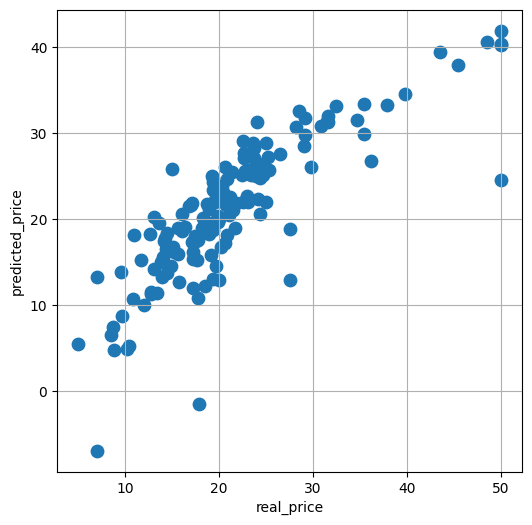

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred, s= 80)
plt.grid()
plt.xlabel('real_price')
plt.ylabel('predicted_price')

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [ ]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.



# 훈련 데이터로 학습 수행

# 검증 데이터로 예측 수행

#평가 지표 값 확인


-과제-

# [응용1] 다중 선형회귀 연습 - load_diabetes

### 필요한 모듈 import

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
diab

{'data': array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
        [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
        [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
        ...,
        [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
        [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
        [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  

### 데이터 수집

In [153]:
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [154]:
diab.data

array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
       [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
       [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
       ...,
       [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
       [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
       [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]])

In [155]:
diab.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [156]:
pd.DataFrame(diab.data)

,0,1,2,3,4,5,6,7,8,9
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047
...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026


### 데이터 이해

10개의 baselines variable
6개의 혈액 검사결과
442명의 당뇨병 환장
1년후의 당뇨병 진행도를 증감을 양으로 

10개의 특성을 표준편차를 가지고 scaled 되어짐.

In [157]:
diab.keys()
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diab_df = pd.DataFrame(diab.data, columns=diab.feature_names)
diab_df

In [177]:
# 변수 간의 상관관계를 히트맵으로 시각화 및 탐색

# 상관계수를 구하여 저장
corr_df = diab_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.0000,0.1737,0.1851,0.3354,0.2601,0.2192,-0.0752,0.2038,0.2708,0.3017
sex,0.1737,1.0000,0.0882,0.2410,0.0353,0.1426,-0.3791,0.3321,0.1499,0.2081
bmi,0.1851,0.0882,1.0000,0.3954,0.2498,0.2612,-0.3668,0.4138,0.4462,0.3887
bp,0.3354,0.2410,0.3954,1.0000,0.2425,0.1855,-0.1788,0.2577,0.3935,0.3904
s1,0.2601,0.0353,0.2498,0.2425,1.0000,0.8967,0.0515,0.5422,0.5155,0.3257
s2,0.2192,0.1426,0.2612,0.1855,0.8967,1.0000,-0.1965,0.6598,0.3184,0.2906
s3,-0.0752,-0.3791,-0.3668,-0.1788,0.0515,-0.1965,1.0000,-0.7385,-0.3986,-0.2737
s4,0.2038,0.3321,0.4138,0.2577,0.5422,0.6598,-0.7385,1.0000,0.6179,0.4172
s5,0.2708,0.1499,0.4462,0.3935,0.5155,0.3184,-0.3986,0.6179,1.0000,0.4647
s6,0.3017,0.2081,0.3887,0.3904,0.3257,0.2906,-0.2737,0.4172,0.4647,1.0000


<AxesSubplot: >

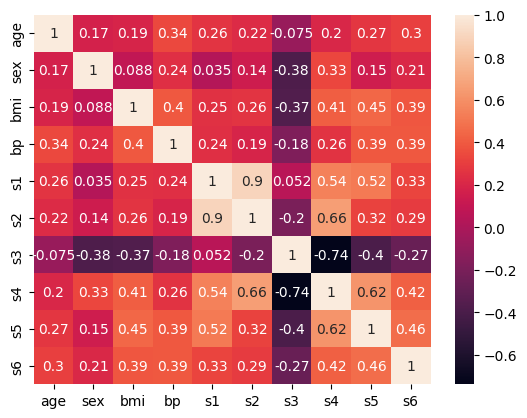

In [179]:
# 상관계수를 히트맵으로 시각화
import seaborn as sns

sns.heatmap(corr_df, annot=True)

In [158]:
pd.options.display.float_format = '{:.4f}'.format

In [160]:
# 기초통계량
pd.DataFrame(diab.data).describe()

,0,1,2,3,4,5,6,7,8,9
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


In [161]:
type(diab.data)

numpy.ndarray

In [162]:
diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466


### 데이터 준비

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)


    print(f'mse - {mse:.4f}')
    print(f'rmse - {rmse: .4f}')
    print(f'r2 - {r2: .4f}')
    return

In [164]:
x = diab.data
y = diab.target

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

### 모델 구축

In [165]:
from sklearn.linear_model import LinearRegression

# 회귀 모델 객체 생성
lr = LinearRegression()

In [166]:
# 모델 학습
reg = lr.fit(x_train, y_train)
reg

LinearRegression()

In [167]:
# 회귀계수가 10개
coef = reg.coef_
coef

array([  42.13, -256.72,  585.67,  300.38, -870.33,  492.32,  184.86,
        262.17,  772.19,   54.45])

In [168]:
# 절편이 1개
intercept = reg.intercept_
intercept

150.8602523396147

### 모델 평가

In [169]:
y_pred = reg.predict(x_test)

evaluate_score(y_test, y_pred)

mse - 2712.4894
rmse -  52.0816
r2 -  0.3953


#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [171]:
# 회귀모델에서 구한 회귀계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
coef = pd.Series(data=coef, index=diab.feature_names)
coef

# 회귀계수값을 기준으로 내림차순으로 정렬
coef.sort_values(ascending=False)

s5     772.1858
bmi    585.6677
s2     492.3214
bp     300.3791
s4     262.1716
s3     184.8594
s6      54.4472
age     42.1333
sex   -256.7243
s1    -870.3327
dtype: float64

###  실제값과 예측값의 분포차이를 시각화

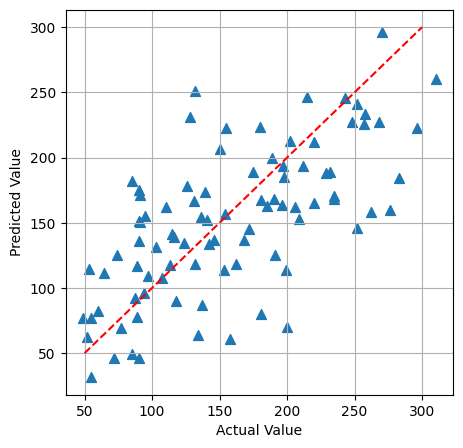

In [175]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=50, marker='^')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.plot([50, 300], [50, 300], ls='--', c='r')
plt.grid()

# [응용2] 캘리포니아 주택 가격

In [180]:
import os
os.getcwd()

'/Users/kimminsoo/Desktop/ML/ML/수업자료'

<img src='./images/cali_house_features.png' width="450" height="450"/>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 수집 및 탐색

In [2]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
# from sklearn.datasets

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

#df = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/california_dataset.csv')
#df

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
housing.feature_names, housing.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
# 샘플:20640
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df

# housing_df에 타겟열을 추가하고 데이터를 입력하시오
housing_df['Price'] = housing.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#속성 :8개
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

### 시각화로 탐색

In [14]:
#데이터프레임으로 변환


# 기초 통계량 확인
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


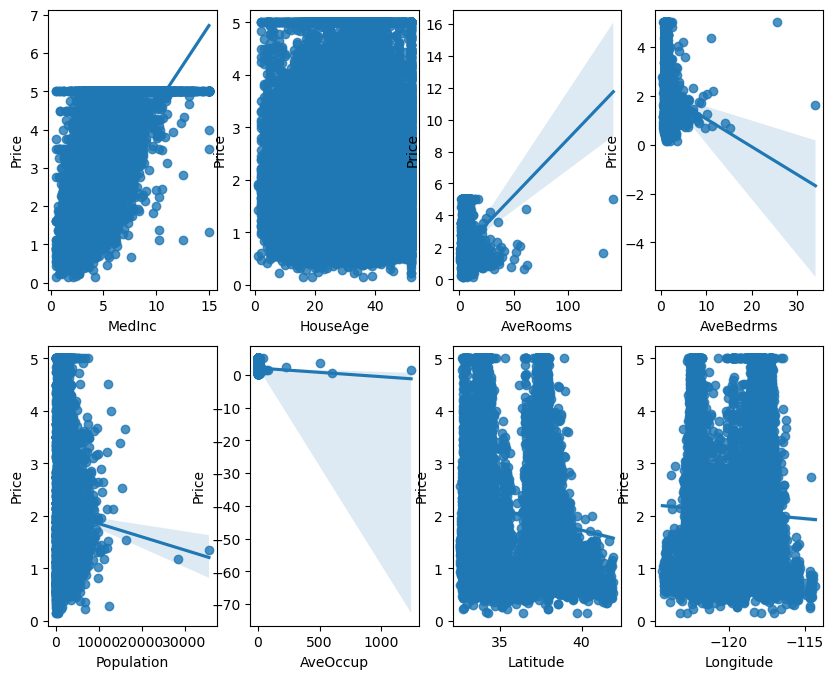

In [21]:
# 종속변수(Price) vs 독립변수(8개) 관계 시각화 탐색
# 2행 4열로 subplot 구조화

fig, ax = plt.subplots(figsize=(10,8), nrows=2, ncols=4)

x_features = housing.feature_names

for i, feature in enumerate(x_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='Price', data=housing_df, ax=ax[row][col])


In [22]:
# 독립변수 간 상관관계 확인
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

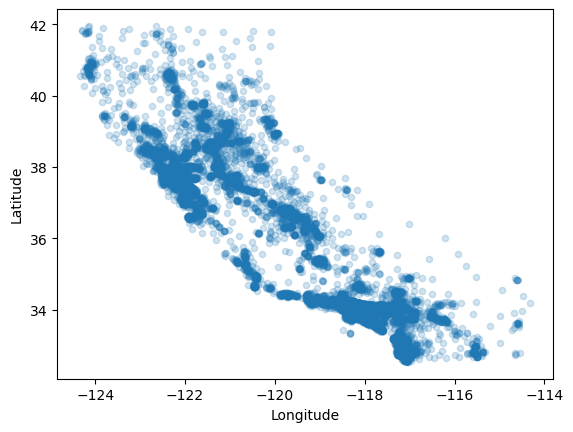

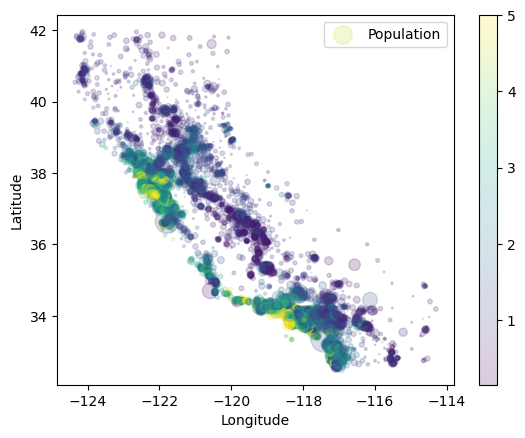

In [26]:
# 위도와 경도 데이터 시각화
housing_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2)

# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다
housing_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, \
                s=housing_df['Population']/100, 
                c=housing_df['Price'], cmap=plt.get_cmap('viridis'),
                label='Population')


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=27)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
reg = lr.fit(x_train, y_train)

In [ ]:
reg.coef_, reg.intercept_

(array([ 4.43946995e-01,  9.73337913e-03, -1.20014445e-01,  7.97856480e-01,
         1.59098524e-07, -3.48723789e-03, -4.23012955e-01, -4.36538635e-01]),
 -37.26341351302502)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)

mse, rmse, r2 = get_score(y_test, y_pred)
print(mse, rmse, r2)

0.5423293447570136 0.736430135693138 0.5886851927020106


In [ ]:
# 데이터의 크기
n = len(x_train)

# 독립변수의 갯수
k = len(x_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - ((1-r2) * (n-1) / (n-k-1))
print('Adjusted R2: {:.4f}'.format(adj_r2))

Adjusted R2: 0.5885


In [ ]:
coef = pd.Series(data=reg.coef_, index=x_train.columns)
coef.sort_values(ascending=False)

AveBedrms     0.7979
MedInc        0.4439
HouseAge      0.0097
Population    0.0000
AveOccup     -0.0035
AveRooms     -0.1200
Latitude     -0.4230
Longitude    -0.4365
dtype: float64

In [ ]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [ ]:
# 독립변수 간 상관관계 확인

In [ ]:


# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다

#pairplot 시각화


In [ ]:
# 위경도 데이터 시각화

# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 한다


<AxesSubplot:>

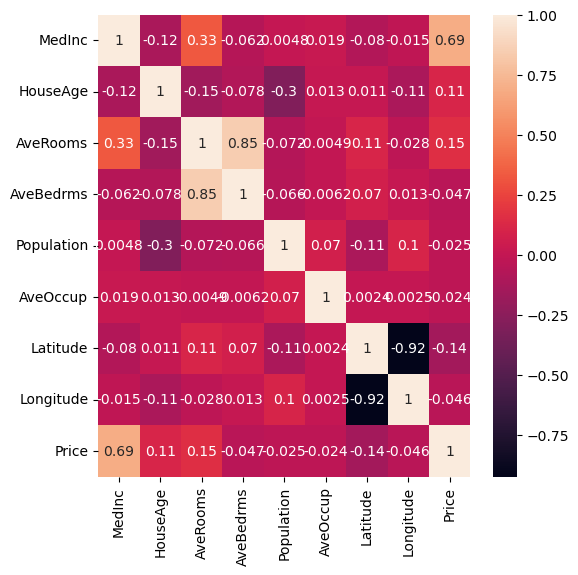

In [27]:
# 상관 계수 히트맵

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
ccol = housing_df.columns

# 변수 간의 상관 계수를 구한다
corr = housing_df[ccol].corr()
#상관 계수 값에 대한 히트맵
#매개변수 annot: 맵에 값 표시 여부 지정
#매개변수 annot_kws: 표시되는 값에 대한 추가 옵션
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True)


In [39]:
# 선형회귀 모델 구축
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = housing.data
y= housing.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

lr = LinearRegression()
reg = lr.fit(x_train, y_train)

coef = reg.coef_
intercept = reg.intercept_
coef = pd.Series(coef, index=housing.feature_names)
coef.sort_values(ascending=False)

# 회귀식으로 표현(y=ax+b)




AveBedrms     7.978565e-01
MedInc        4.439470e-01
HouseAge      9.733379e-03
Population    1.590985e-07
AveOccup     -3.487238e-03
AveRooms     -1.200144e-01
Latitude     -4.230130e-01
Longitude    -4.365386e-01
dtype: float64

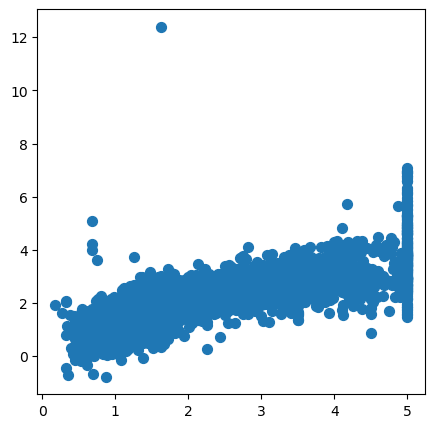

In [37]:
# 결과 시각화 ( actual price VS predicted price)
y_pred = reg.predict(x_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=50)

In [33]:
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(x_test)

# 평가 지표 계산
evaluate_score(y_test, y_pred)

# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수

# 수정된 결정 계수


mse - 0.5423
rmse -  0.7364
r2 -  0.5887


# [도전] 펭귄 몸무게 예측(dacon)

# [도전] 자전거 대여 수요 예측(Kaggle)

- datetime: hourly date + timestamp
- season: 1=봄, 2=여름, 3=가을, 4=겨울
- holiday: 1=토, 일요일의 주말을 제외한 국경일 등의 휴일, 0= 휴일이 아닌 날
- workingday: 1=토, 일요일의 주말 및 휴일이 아닌 주중, 0=주말 및 휴일
- weather:
* 1 : 맑음, 약간 구름 낀 흐림
* 2 : 안개, 안개  + 흐림
* 3 : 가벼운 눈, 가벼운 비 + 천둥
* 4 : 심한 눈/비, 천둥/번개

- temp: 온도(섭씨)
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 풍속
- casual: 사전에 등록되지 않은 사용자가 대여한 횟수
- registered: 사전에 등록한 사용자가 대여한 횟수
- count: 대여 횟수

------------------------------------------------------------------------------

## 회귀 트리를 이용한 예측은 추후 추가
- RandomForestRegressor
- GradientBoostRegressor
- XGBRegressor
- LGBMRegressor